# Assignment 4 Question 1
### Delivery_time -> Predict delivery time using sorting time 
### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.columns = ['DT','ST']
data.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Rearanging the columns

In [4]:
data = data.iloc[:,[1,0]]

data.head()

,ST,DT
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ST      21 non-null     int64  
 1   DT      21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


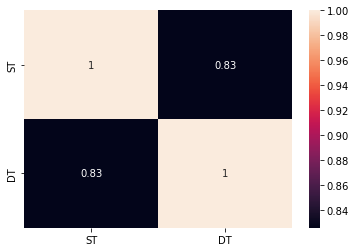

In [6]:
# Correlation
sns.heatmap(data.corr(),annot=True)
plt.show()

<Axes: xlabel='DT', ylabel='Count'>

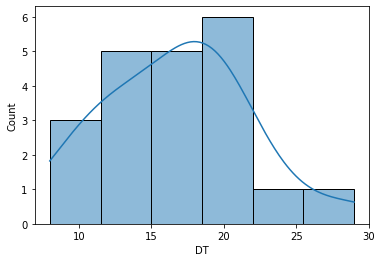

In [7]:
sns.histplot(data['DT'], kde=True)

<Axes: xlabel='ST', ylabel='Count'>

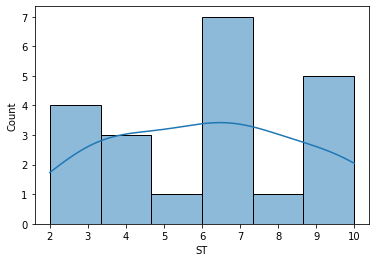

In [8]:
sns.histplot(data['ST'], kde=True)

<Axes: xlabel='ST', ylabel='DT'>

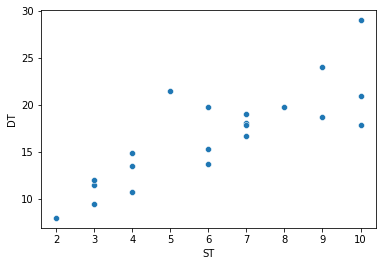

In [9]:
sns.scatterplot(x=data['ST'], y=data['DT'])

<Axes: xlabel='ST', ylabel='DT'>

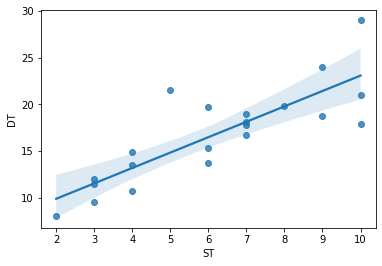

In [10]:
sns.regplot(x='ST',y='DT',data=data)

In [11]:
model = smf.ols(formula='DT~ST', data=data).fit()

# print(model.summary())

model.params

print(model.tvalues, '\n', model.pvalues)

print(model.rsquared)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64
0.6822714748417231


## Initiating the list to store the R-Square Values for every model

In [12]:
R_Squared_list = []
model_r_square = ['Simple Model',model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.6822714748417231]]

# Predicted Equation (Delivery_Time = m(Sorting_Time) + c)

### Delivery_Time = (6.387447)*Sorting_Time +(3.823349)

# Prediction for new datapoints

In [13]:
new_data = pd.DataFrame(pd.Series([4,7,10,9]), columns=['ST'])
new_data

,ST
0,4
1,7
2,10
3,9


In [14]:
model.predict(new_data)

0    13.178814
1    18.125873
2    23.072933
3    21.423913
dtype: float64

## Residual Plot for Simple Linear Regression without transformation

<Axes: xlabel='ST'>

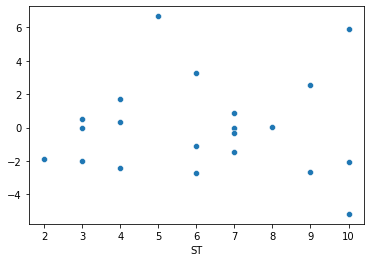

In [15]:
sns.scatterplot(x=data['ST'], y=(data['DT'] - model.predict(data['ST'])))

<Axes: ylabel='Count'>

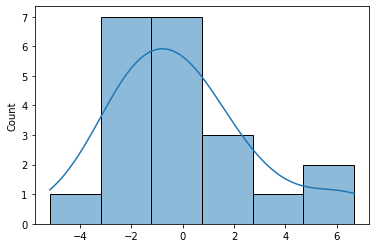

In [16]:
sns.histplot(data['DT'] - model.predict(data['ST']), kde=True)

## Insights:
- The Residual values shows a funnel-shape pattern, it is considered a sign of non-equal variance of the residuals.
- This can be corrected by using a non-linear transformation (logarithmic, polynomial, or square root) on the outcome variable Y.

Referance: https://quantifyinghealth.com/variable-transformations-in-regression/

# Tranformations

In [17]:
data['Log_DT'] = np.log(data['DT'])  ## log(x) Transformation
data['sqrt_DT'] = np.sqrt(data['DT']) ## (x)^1/2 Transformation
data['sqre_DT'] = np.power(data['DT'],2)  ## x^2 Transformation
data['cube_DT'] = np.power(data['DT'],3)  ## x^3 Transformation
data['inverse_DT'] = np.power(data['DT'],-1) ## 1/x Transformation

In [18]:
data.head(2)

,ST,DT,Log_DT,sqrt_DT,sqre_DT,cube_DT,inverse_DT
0,10,21.0,3.044522,4.582576,441.00,9261.000,0.047619
1,4,13.5,2.602690,3.674235,182.25,2460.375,0.074074


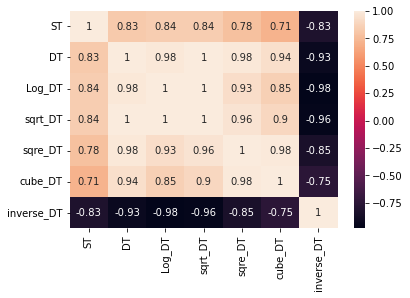

In [19]:
sns.heatmap(data.corr(), annot=True)
plt.show()

# Insights:
### The maximum correlation is with `log(x)` and `x^1/2` transformation but margin is not too big compared to non-transformed axis

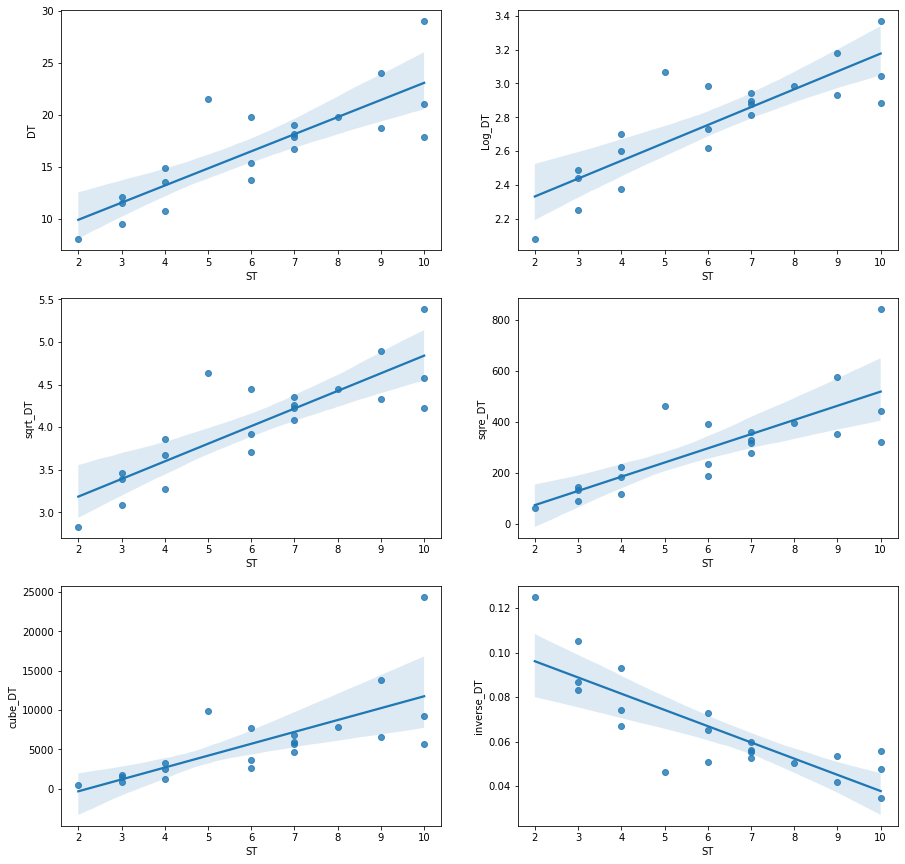

In [20]:
fig, axs = plt.subplots(3,2,figsize=(15,15))
sns.regplot(x='ST',y='DT',data=data,ax=axs[0,0])
sns.regplot(x='ST',y='Log_DT',data=data,ax=axs[0,1])
sns.regplot(x='ST',y='sqrt_DT',data=data,ax=axs[1,0])
sns.regplot(x='ST',y='sqre_DT',data=data,ax=axs[1,1])
sns.regplot(x='ST',y='cube_DT',data=data,ax=axs[2,0])
sns.regplot(x='ST',y='inverse_DT',data=data,ax=axs[2,1])
plt.show()

# `log(x)` Transformed Model

In [21]:
log_model = smf.ols(formula='Log_DT~ST', data=data).fit()

# print(model.summary())

log_model.params

print(log_model.tvalues, '\n', log_model.pvalues)

log_model.rsquared

Intercept    20.601357
ST            6.836088
dtype: float64 
 Intercept    1.857343e-14
ST           1.592708e-06
dtype: float64


0.7109478980584187

In [22]:
model_r_square = ['log(x) Transformed Model',log_model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.6822714748417231],
 ['log(x) Transformed Model', 0.7109478980584187]]

## Residual Plot from `log(x)` Transformed Model

<Axes: xlabel='ST'>

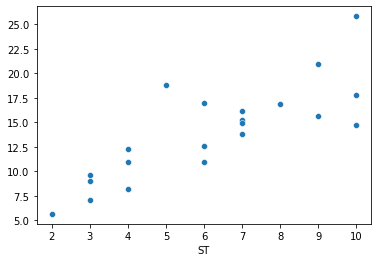

In [24]:
sns.scatterplot(x=data['ST'], y=data['DT'] - log_model.predict(data['ST']))

<Axes: ylabel='Count'>

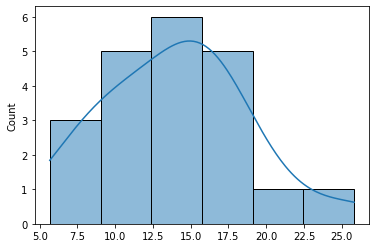

In [25]:
sns.histplot(data['DT'] - log_model.predict(data['ST']), kde=True)

## Insights:
- The Residual is linearly increasing

# `x^1/2` Transformed Model

<Axes: xlabel='ST', ylabel='sqrt_DT'>

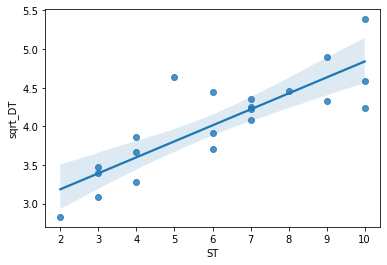

In [26]:
sns.regplot(x='ST',y='sqrt_DT',data=data)

In [27]:
sqrt_model = smf.ols(formula='sqrt_DT~ST', data=data).fit()

# print(model.summary())

sqrt_model.params

print(sqrt_model.tvalues, '\n', sqrt_model.pvalues)

sqrt_model.rsquared

Intercept    13.527452
ST            6.723095
dtype: float64 
 Intercept    3.339366e-11
ST           2.001215e-06
dtype: float64


0.7040498715417561

In [28]:
model_r_square = ['Sqrt(x) Transformed Model',sqrt_model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.6822714748417231],
 ['log(x) Transformed Model', 0.7109478980584187],
 ['Sqrt(x) Transformed Model', 0.7040498715417561]]

## Residual Plot from `Sqrt(x)` Transformed Model

<Axes: xlabel='ST'>

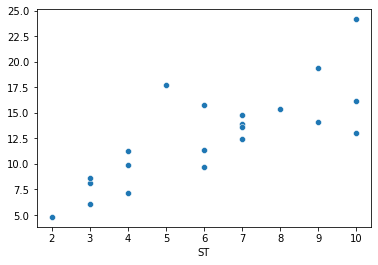

In [29]:
sns.scatterplot(x=data['ST'], y = data['DT'] - sqrt_model.predict(data['ST']))

## Insights:
- The Residual is linearly increasing

# `x^2` Transformed Model

<Axes: xlabel='ST', ylabel='sqre_DT'>

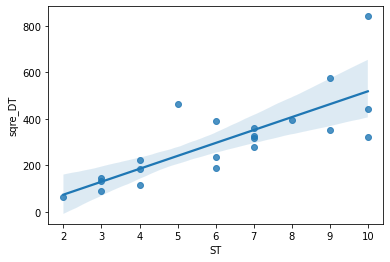

In [30]:
sns.regplot(x='ST',y='sqre_DT',data=data)

In [31]:
sqre_model = smf.ols(formula='sqre_DT~ST', data=data).fit()

# print(model.summary())

sqre_model.params

print(sqre_model.tvalues, '\n', sqre_model.pvalues)

print(sqre_model.rsquared)

Intercept   -0.542504
ST           5.368383
dtype: float64 
 Intercept    0.593778
ST           0.000035
dtype: float64
0.6026728443618878


In [32]:
model_r_square = ['x^2 Transformed Model',sqre_model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.6822714748417231],
 ['log(x) Transformed Model', 0.7109478980584187],
 ['Sqrt(x) Transformed Model', 0.7040498715417561],
 ['x^2 Transformed Model', 0.6026728443618878]]

## Residual Plot from `x^2` Transformed Model

<Axes: xlabel='ST'>

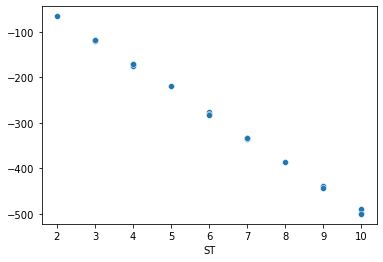

In [33]:
sns.scatterplot(x=data['ST'], y=data['DT']-sqre_model.predict(data['ST']))

## Insights:
### The Residual is linear and increasing hence cube model will be worse

# Doing some more transformations based on the observations from above done iterations

In [34]:
data['cube_root_DT'] = np.power(data['DT'],1/3)  ## Cube root transformation
data['quadratic_DT'] = np.power(data['DT'],2) + np.power(data['DT'],1) ## x^2 + x Transformation
data['sin_DT'] = np.sin(data['DT']) ## Sin Transformation
data['cos_DT'] = np.cos(data['DT']) ## Cos Transformation
data['sqre_sin_DT'] = np.power(data['DT'],2) + np.sin(data['DT']) ## X^2 + SIN(X) Transformation
data['sqre_cos_DT'] = np.power(data['DT'],2) + np.cos(data['DT']) ## X^2 + COS(X) Transformation

data['x_sin_DT'] = np.power(data['DT'],1) + np.sin(data['DT']) ## X + SIN(X) Transformation
data['x_cos_DT'] = np.power(data['DT'],1) + np.cos(data['DT']) ## X + COS(X) Transformation

In [35]:
data.head(2)

,ST,DT,Log_DT,sqrt_DT,sqre_DT,cube_DT,inverse_DT,cube_root_DT,quadratic_DT,sin_DT,cos_DT,sqre_sin_DT,sqre_cos_DT,x_sin_DT,x_cos_DT
0,10,21.0,3.044522,4.582576,441.00,9261.000,0.047619,2.758924,462.00,0.836656,-0.547729,441.836656,440.452271,21.836656,20.452271
1,4,13.5,2.602690,3.674235,182.25,2460.375,0.074074,2.381102,195.75,0.803784,0.594921,183.053784,182.844921,14.303784,14.094921


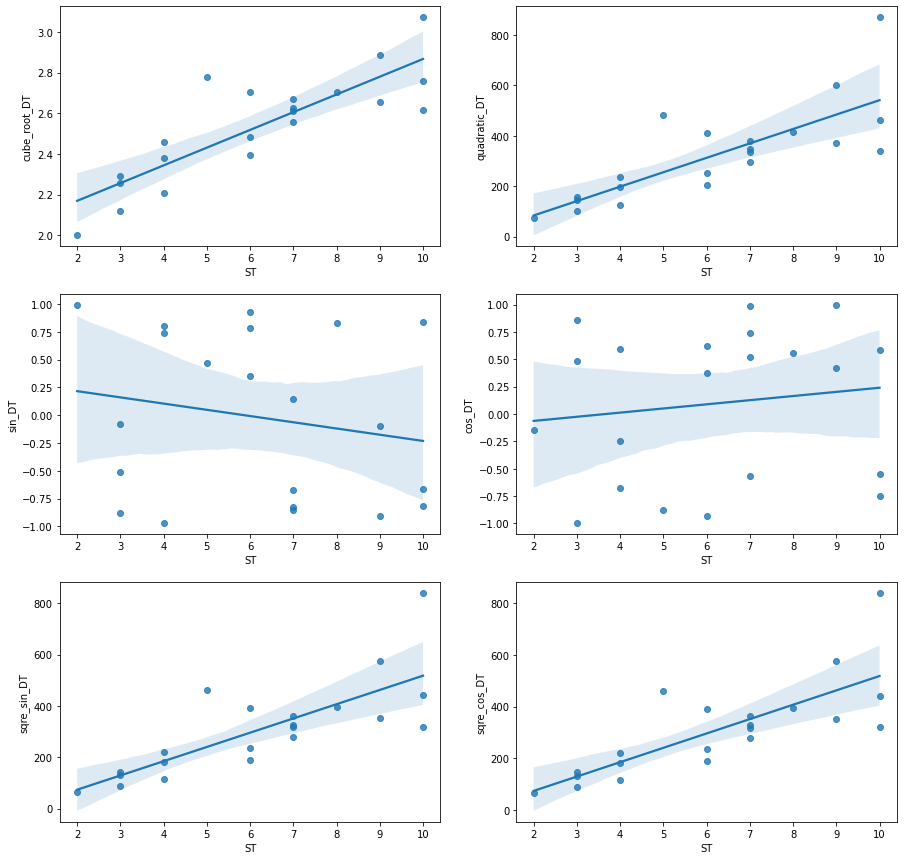

In [36]:
fig, axs = plt.subplots(3,2,figsize=(15,15))
sns.regplot(x='ST',y='cube_root_DT',data=data,ax=axs[0,0])
sns.regplot(x='ST',y='quadratic_DT',data=data,ax=axs[0,1])
sns.regplot(x='ST',y='sin_DT',data=data,ax=axs[1,0])
sns.regplot(x='ST',y='cos_DT',data=data,ax=axs[1,1])
sns.regplot(x='ST',y='sqre_sin_DT',data=data,ax=axs[2,0])
sns.regplot(x='ST',y='sqre_cos_DT',data=data,ax=axs[2,1])
plt.show()

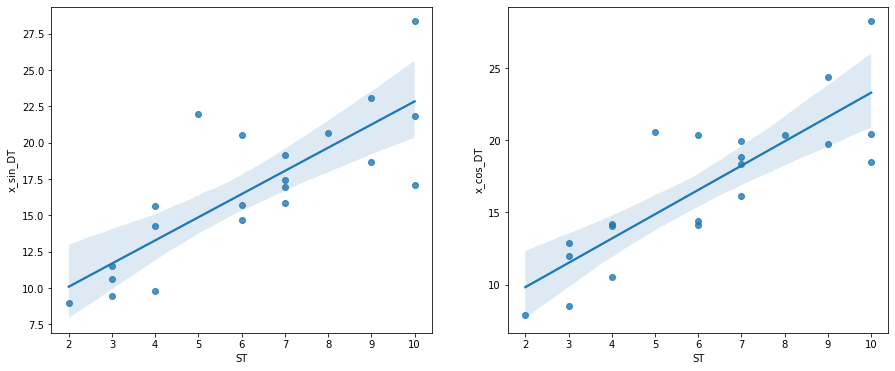

In [37]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
sns.regplot(x='ST',y='x_sin_DT',data=data,ax=axs[0])
sns.regplot(x='ST',y='x_cos_DT',data=data,ax=axs[1])
plt.show()

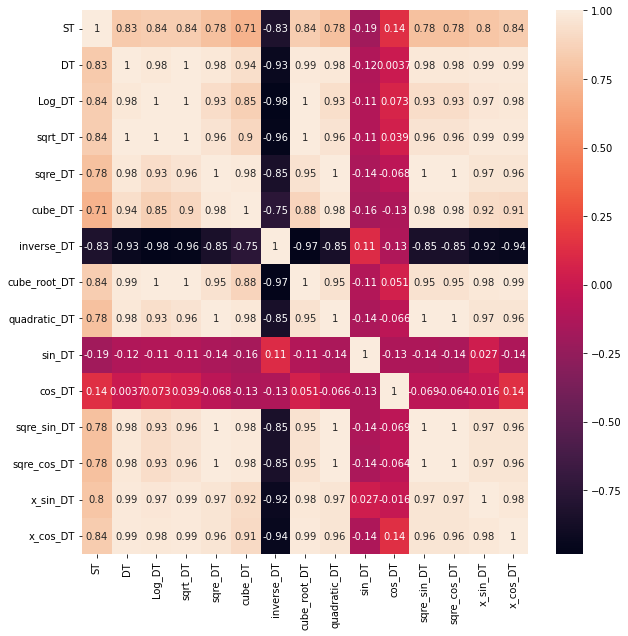

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.show()

# Insights:
### The maximum correlation is still 0.84 only

In [39]:
data['log_cos_DT'] = np.log(data['DT']) + np.cos(data['DT']) ## log(X) + COS(X) Transformation
data['sqrt_cos_DT'] = np.power(data['DT'],1/2) + np.cos(data['DT']) ## sqrt(X) + COS(X) Transformation
data.head(2)

,ST,DT,Log_DT,sqrt_DT,sqre_DT,cube_DT,inverse_DT,cube_root_DT,quadratic_DT,sin_DT,cos_DT,sqre_sin_DT,sqre_cos_DT,x_sin_DT,x_cos_DT,log_cos_DT,sqrt_cos_DT
0,10,21.0,3.044522,4.582576,441.00,9261.000,0.047619,2.758924,462.00,0.836656,-0.547729,441.836656,440.452271,21.836656,20.452271,2.496793,4.034846
1,4,13.5,2.602690,3.674235,182.25,2460.375,0.074074,2.381102,195.75,0.803784,0.594921,183.053784,182.844921,14.303784,14.094921,3.197610,4.269155


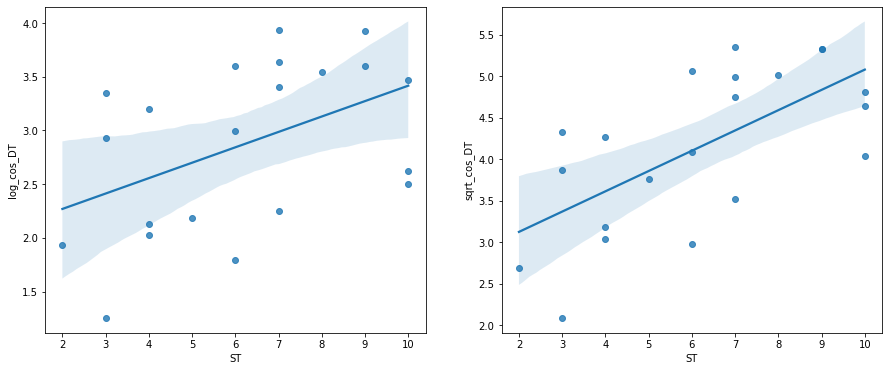

In [40]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
sns.regplot(x='ST',y='log_cos_DT',data=data,ax=axs[0])
sns.regplot(x='ST',y='sqrt_cos_DT',data=data,ax=axs[1])
plt.show()

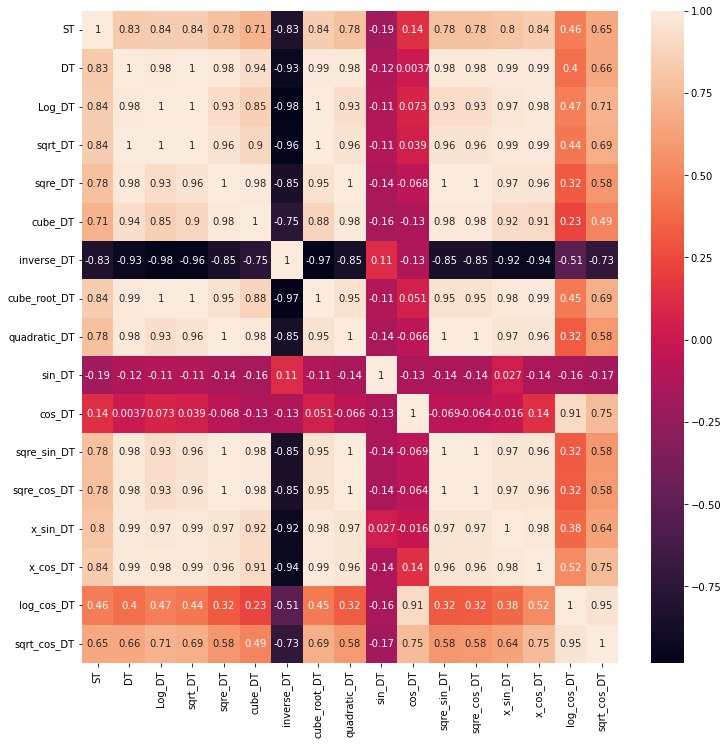

In [41]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.show()

In [42]:
data['log_x_cos_DT'] = np.log(np.power(data['DT'],1) + np.cos(data['DT'])) ## log(X + COS(X)) Transformation

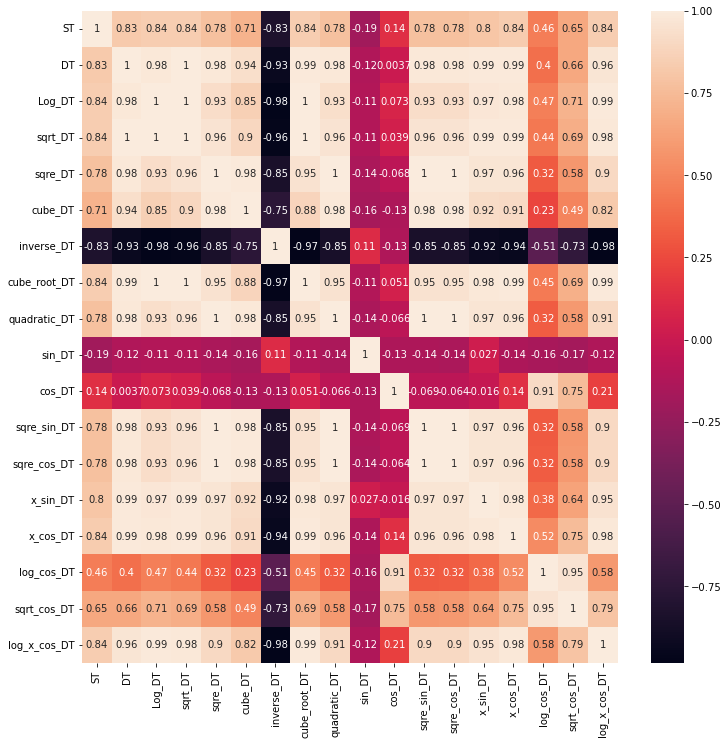

In [43]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.show()

# Insights:
### With the observation of correlation model should be fit again with `x_cos_DT`, `log_x_cos_DT`

# `X+cos(X)` Transformed Model

<Axes: xlabel='ST', ylabel='x_cos_DT'>

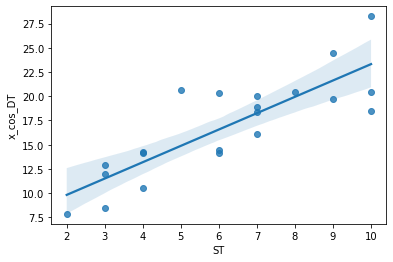

In [44]:
sns.regplot(x='ST',y='x_cos_DT',data=data)

In [45]:
x_cos_model = smf.ols(formula='x_cos_DT~ST', data=data).fit()

# print(cube_model.summary())

x_cos_model.params

print(x_cos_model.tvalues, '\n', x_cos_model.pvalues)

print(x_cos_model.rsquared)

Intercept    3.815180
ST           6.660991
dtype: float64 
 Intercept    0.001169
ST           0.000002
dtype: float64
0.700167941641485


In [46]:
model_r_square = ['x+cos(x) Transformed Model',x_cos_model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.6822714748417231],
 ['log(x) Transformed Model', 0.7109478980584187],
 ['Sqrt(x) Transformed Model', 0.7040498715417561],
 ['x^2 Transformed Model', 0.6026728443618878],
 ['x+cos(x) Transformed Model', 0.700167941641485]]

## Residual Plot from `X+cos(X)` Transformed Model

<Axes: xlabel='ST'>

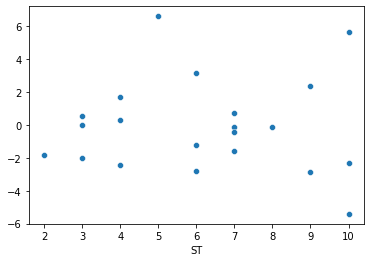

In [47]:
sns.scatterplot(x=data['ST'], y=data['DT']-x_cos_model.predict(data['ST']))

# `log(x+cos(x))` Transformed Model

<Axes: xlabel='ST', ylabel='log_x_cos_DT'>

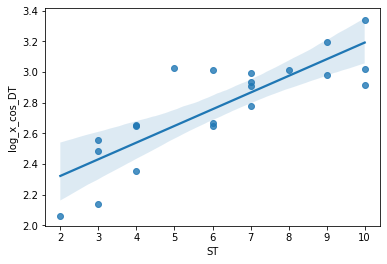

In [48]:
sns.regplot(x='ST',y='log_x_cos_DT',data=data)

In [49]:
log_x_cos_model = smf.ols(formula='log_x_cos_DT~ST', data=data).fit()

# print(cube_model.summary())

log_x_cos_model.params

print(log_x_cos_model.tvalues, '\n', log_x_cos_model.pvalues)

print(log_x_cos_model.rsquared)

Intercept    19.504699
ST            6.726518
dtype: float64 
 Intercept    5.021641e-14
ST           1.987372e-06
dtype: float64
0.7042619284437794


In [50]:
model_r_square = ['Log(x+Cos(x)) Transformed Model',log_x_cos_model.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.6822714748417231],
 ['log(x) Transformed Model', 0.7109478980584187],
 ['Sqrt(x) Transformed Model', 0.7040498715417561],
 ['x^2 Transformed Model', 0.6026728443618878],
 ['x+cos(x) Transformed Model', 0.700167941641485],
 ['Log(x+Cos(x)) Transformed Model', 0.7042619284437794]]

## Residual Plot from `Log(x+Cos(x))` Transformed Model

<Axes: xlabel='ST'>

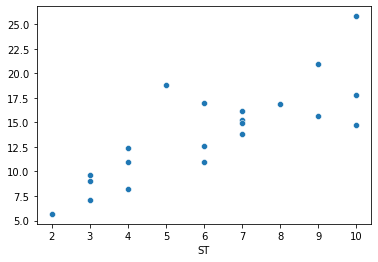

In [51]:
sns.scatterplot(x=data['ST'], y=data['DT']-log_x_cos_model.predict(data['ST']))

# Final `R^2` Dataframe

In [52]:
R_Squared_df = pd.DataFrame(R_Squared_list,columns=['Model_Name', 'R_Square_Value'])
R_Squared_df

,Model_Name,R_Square_Value
0,Simple Model,0.682271
1,log(x) Transformed Model,0.710948
2,Sqrt(x) Transformed Model,0.704050
3,x^2 Transformed Model,0.602673
4,x+cos(x) Transformed Model,0.700168
5,Log(x+Cos(x)) Transformed Model,0.704262


# Insight:
### We can see that the `log(x)` transformed model has the best `R^2` so far

# Will try to remove some high influence points using Cook's distance for log(x) transformed model and fit the model again

In [54]:
## Getting the Cook's distance threshold
cook_distance_threshold = 4/(data.shape[0])
cook_distance_threshold

0.19047619047619047

In [55]:
model_influence = log_model.get_influence()
c, _ = model_influence.cooks_distance
c

array([6.44234360e-02, 5.73644232e-03, 4.47609612e-02, 2.52869964e-02,
       1.33310794e-01, 4.76215841e-04, 6.75604051e-03, 9.37036881e-02,
       3.13703794e-01, 4.36078644e-02, 6.31546123e-04, 4.67076583e-02,
       2.01813365e-03, 5.01592645e-05, 6.55168851e-03, 4.01785241e-02,
       1.53152187e-02, 1.25075714e-03, 2.85970230e-01, 4.06276136e-04,
       1.88260337e-01])

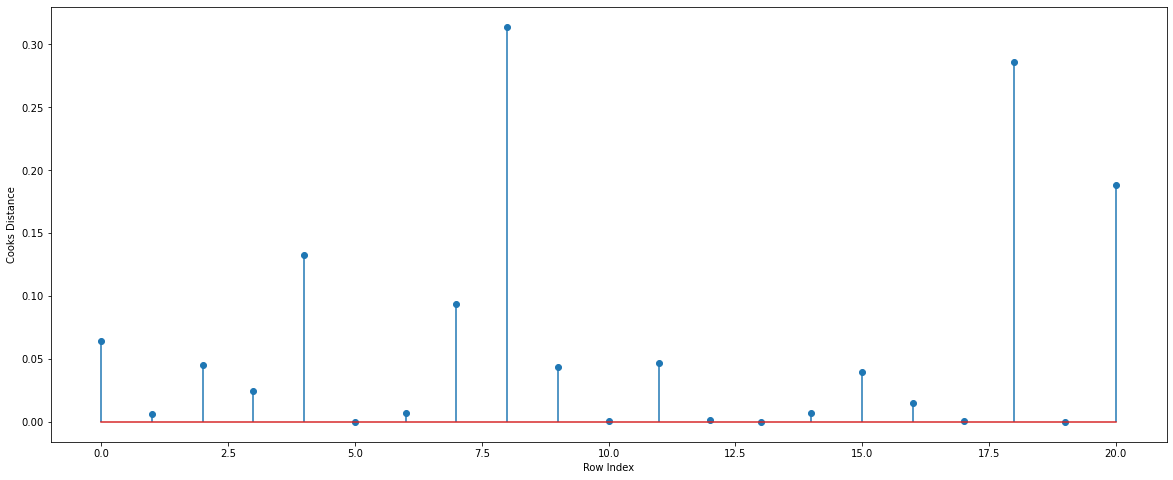

In [56]:
# Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [57]:
# Indexes where the Cook's distance is more than threshold
np.argwhere(c>cook_distance_threshold)

array([[ 8],
       [18]])

In [58]:
df = data.copy()

### Removing the high influence points

In [59]:
df_new = df.drop(df.index[[8,18]],axis=0).reset_index()
df_new = df_new.drop(['index'],axis=1)
df_new.head(2)

,ST,DT,Log_DT,sqrt_DT,sqre_DT,cube_DT,inverse_DT,cube_root_DT,quadratic_DT,sin_DT,cos_DT,sqre_sin_DT,sqre_cos_DT,x_sin_DT,x_cos_DT,log_cos_DT,sqrt_cos_DT,log_x_cos_DT
0,10,21.0,3.044522,4.582576,441.00,9261.000,0.047619,2.758924,462.00,0.836656,-0.547729,441.836656,440.452271,21.836656,20.452271,2.496793,4.034846,3.018094
1,4,13.5,2.602690,3.674235,182.25,2460.375,0.074074,2.381102,195.75,0.803784,0.594921,183.053784,182.844921,14.303784,14.094921,3.197610,4.269155,2.645814


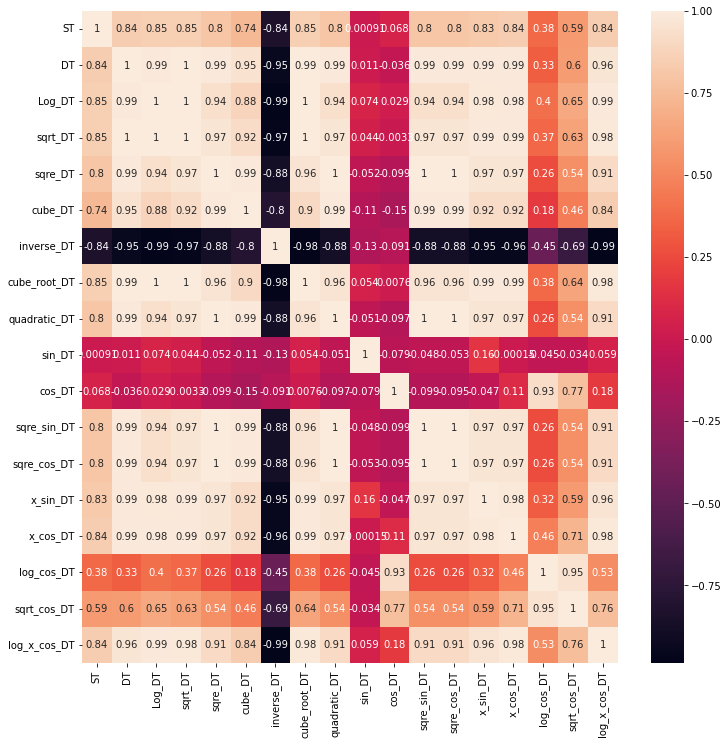

In [60]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_new.corr(), annot=True, ax=ax)
plt.show()

# Insight:
### The correlation has now improved to 0.85

# `log(x)` Transformed Model, After removing high influence points

In [61]:
log_model2 = smf.ols(formula='Log_DT~ST', data=df_new).fit()

# print(model.summary())

log_model2.params

print(log_model2.tvalues, '\n', log_model2.pvalues)

log_model2.rsquared

Intercept    20.364818
ST            6.642690
dtype: float64 
 Intercept    2.226750e-13
ST           4.155229e-06
dtype: float64


0.7218828887558812

In [62]:
model_r_square = ['log(x) Transformed Model 2',log_model2.rsquared]
R_Squared_list.append(model_r_square)
R_Squared_list

[['Simple Model', 0.6822714748417231],
 ['log(x) Transformed Model', 0.7109478980584187],
 ['Sqrt(x) Transformed Model', 0.7040498715417561],
 ['x^2 Transformed Model', 0.6026728443618878],
 ['x+cos(x) Transformed Model', 0.700167941641485],
 ['Log(x+Cos(x)) Transformed Model', 0.7042619284437794],
 ['log(x) Transformed Model 2', 0.7218828887558812]]

## Residual Plot from new Log Transformed Model

<Axes: xlabel='ST'>

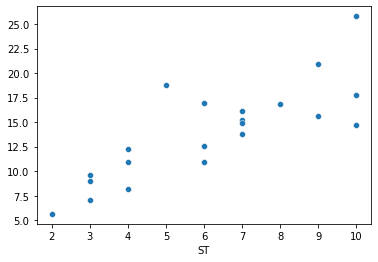

In [63]:
sns.scatterplot(x=data['ST'], y=data['DT'] - log_model2.predict(data['ST']))

# Best `R^2` and Corresponding model

In [64]:
R_Squared_df = pd.DataFrame(R_Squared_list,columns=['Model_Name', 'R_Square_Value'])
R_Squared_df

,Model_Name,R_Square_Value
0,Simple Model,0.682271
1,log(x) Transformed Model,0.710948
2,Sqrt(x) Transformed Model,0.704050
3,x^2 Transformed Model,0.602673
4,x+cos(x) Transformed Model,0.700168
5,Log(x+Cos(x)) Transformed Model,0.704262
6,log(x) Transformed Model 2,0.721883


In [66]:
R_Squared_df[R_Squared_df['R_Square_Value']==R_Squared_df['R_Square_Value'].max()]

,Model_Name,R_Square_Value
6,log(x) Transformed Model 2,0.721883
